In [2]:
#turn dataset into csv file


from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
steel_plates_faults = fetch_ucirepo(id=198)

# Data (as pandas dataframes)
X = steel_plates_faults.data.features
y = steel_plates_faults.data.targets

# Combine features and targets into a single DataFrame
data = pd.concat([X, y], axis=1)

# Save to CSV file
data.to_csv("steel_plates_faults.csv", index=False)

# Metadata
print(steel_plates_faults.metadata)

# Variable information
print(steel_plates_faults.variables)


{'uci_id': 198, 'name': 'Steel Plates Faults', 'repository_url': 'https://archive.ics.uci.edu/dataset/198/steel+plates+faults', 'data_url': 'https://archive.ics.uci.edu/static/public/198/data.csv', 'abstract': 'A dataset of steel platesâ€™ faults, classified into 7 different types. \nThe goal was to train machine learning for automatic pattern recognition.\n', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1941, 'num_features': 27, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2010, 'last_updated': 'Tue Apr 09 2024', 'dataset_doi': '10.24432/C5J88N', 'creators': ['M Buscema', 'S Terzi', 'W Tastle'], 'intro_paper': None, 'additional_info': {'summary': 'Type of dependent variables (7 Types of Steel Plates 

In [20]:

#deciding which model to use

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier

# Specify the path to your CSV file
csv_path = "normalized_data.csv"

# Load the CSV file
data = pd.read_csv(csv_path)

# Specify the target columns (you can change this as needed)
target_columns = ["Pastry", "Z_Scratch", "K_Scratch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]

# Split features and target
X = data.drop(columns=target_columns)
y = data[target_columns]

# Preprocess the data (Standardize features)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "KNN": KNeighborsClassifier(),
    "Weighted KNN": KNeighborsClassifier(weights='distance'),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "MLP": MLPClassifier(max_iter=1000),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Initialize result storage
results = {}

# Evaluate each model
for name, model in models.items():
    # Use MultiOutputClassifier for multi-output classification
    multi_target_model = MultiOutputClassifier(model, n_jobs=-1)
    
    # Fit the model on the training data
    multi_target_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = multi_target_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate F1-score (weighted average) for each target
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    
    # Store results
    results[name] = {'Accuracy': accuracy, 'F1-Score': f1}

# Sort models by accuracy and display results
sorted_results = sorted(results.items(), key=lambda x: x[1]['Accuracy'], reverse=True)

print("\nModel Performance (Accuracy and F1-Score):\n")
for i, (model_name, metrics) in enumerate(sorted_results, start=1):
    print(f"{i}. {model_name}: Accuracy = {metrics['Accuracy']:.2f}, F1-Score = {metrics['F1-Score']:.2f}")



Model Performance (Accuracy and F1-Score):

1. Weighted KNN: Accuracy = 0.70, F1-Score = 0.72
2. KNN: Accuracy = 0.69, F1-Score = 0.71
3. MLP: Accuracy = 0.66, F1-Score = 0.72
4. Logistic Regression: Accuracy = 0.59, F1-Score = 0.68
5. LDA: Accuracy = 0.55, F1-Score = 0.66
6. QDA: Accuracy = 0.32, F1-Score = 0.66
7. Naive Bayes: Accuracy = 0.23, F1-Score = 0.61


In [22]:
#normalising dataset

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load CSV file
csv_path = "steel_plates_faults.csv"  # Specify your CSV file path here
data = pd.read_csv(csv_path)

# Show the first few rows of the dataset
print("Original Data Preview:")
print(data.head())

# Specify the target columns
target_columns = ["Pastry", "Z_Scratch", "K_Scratch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]

# Split features and target
X = data.drop(columns=target_columns)  # Features
y = data[target_columns]  # Multiple target columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the feature columns
X_normalized = scaler.fit_transform(X)

# Create a DataFrame from the normalized data
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Concatenate the target columns back to the normalized feature data
normalized_data = pd.concat([X_normalized_df, y], axis=1)

# Save the normalized data to a new CSV file
normalized_data.to_csv("normalized_data.csv", index=False)

# Show the first few rows of the normalized data
print("\nNormalized Data Preview:")
print(normalized_data.head())


Original Data Preview:
   X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Maximum_of_Luminosity  Length_of_Conveyer  \
0           44              24220                    108                1687   
1           30              11397                    123                1687   
2           19               7972                    125                1623   
3           45              18996                    126                1353   
4          260             246930                    126                1353   

   ...  Luminosity_Index  SigmoidOfArea

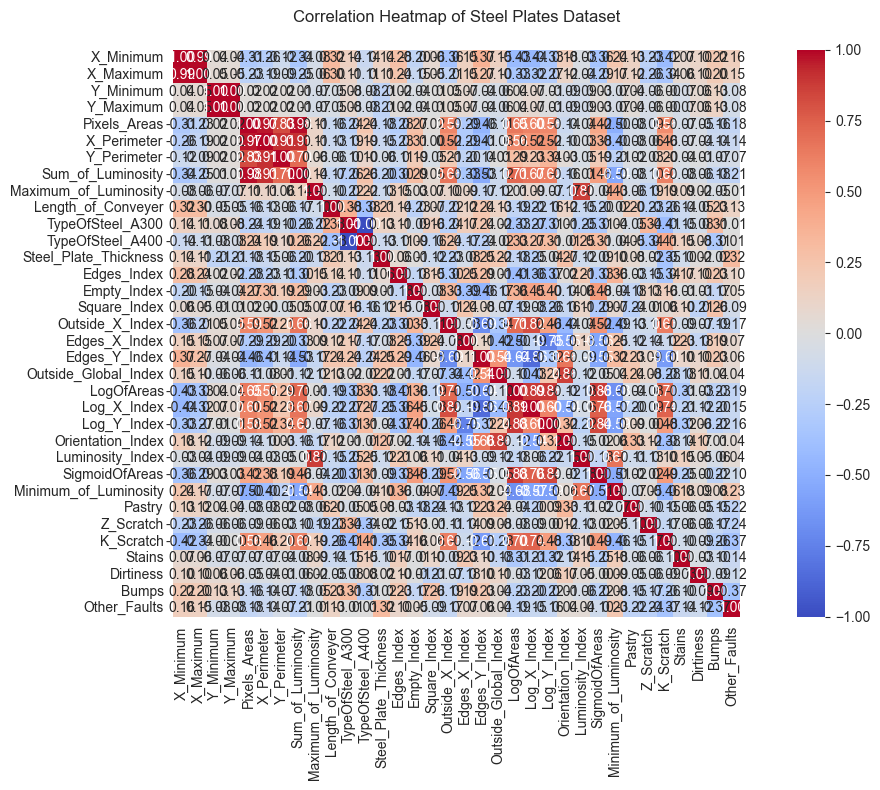

In [43]:
#heatmap


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv("normalized_data.csv")

# Handle any missing values
data = data.replace("?", np.nan)
data = data.dropna()

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Create figure
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Format annotations to 2 decimal places
            square=True)  # Make the plot square-shaped

plt.title('Correlation Heatmap of Steel Plates Dataset', pad=20)
plt.tight_layout()
plt.show()

Top Correlated Features:

Features selected: ['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Y_Minimum', 'Y_Maximum']

Correlation Matrix:
                  TypeOfSteel_A300  TypeOfSteel_A400  Y_Minimum  Y_Maximum
TypeOfSteel_A300          1.000000         -1.000000   0.075164   0.075151
TypeOfSteel_A400         -1.000000          1.000000  -0.075164  -0.075151
Y_Minimum                 0.075164         -0.075164   1.000000   1.000000
Y_Maximum                 0.075151         -0.075151   1.000000   1.000000


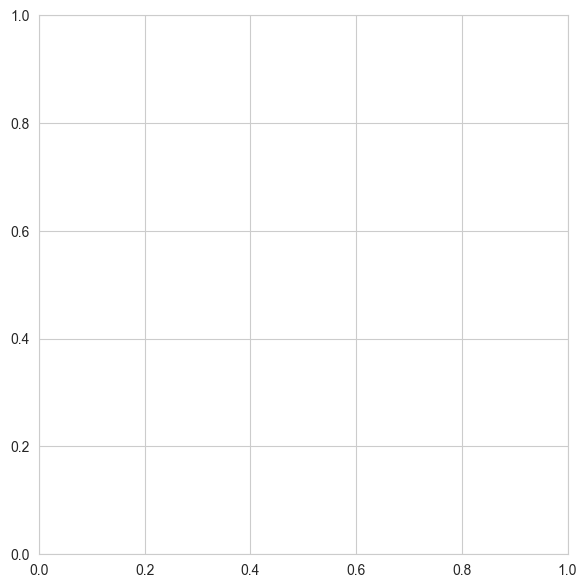

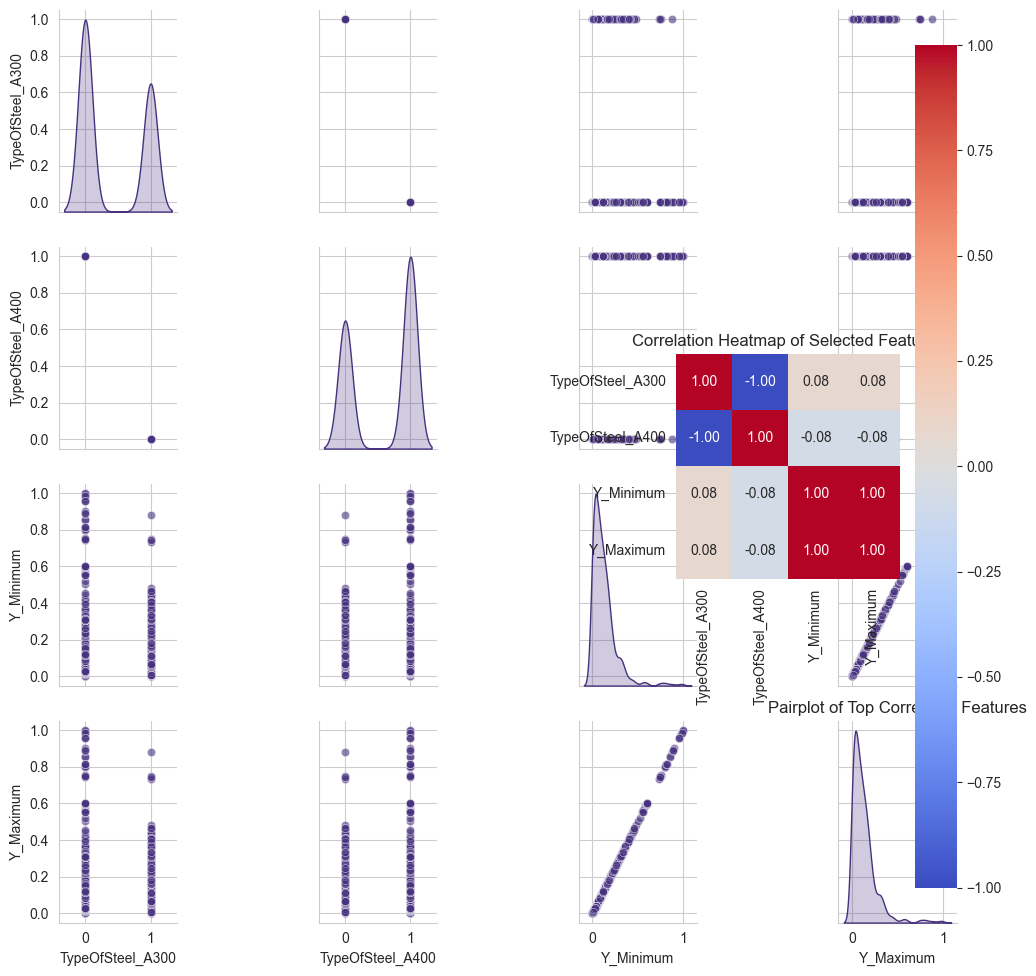

In [39]:

#top correlation pairplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the data
def load_data(file_path):
    data = pd.read_csv(file_path)
    data = data.replace("?", np.nan)
    data = data.dropna()
    return data

# Find top correlated features
def get_top_correlated_features(data, n_features=4):
    # Select numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Calculate correlation matrix
    correlation_matrix = numeric_data.corr()
    
    # Get pairs of features with highest absolute correlation
    correlations = correlation_matrix.abs().unstack()
    correlations = correlations[correlations < 1.0]  # Remove self-correlations
    top_correlations = correlations.sort_values(ascending=False)
    
    # Get unique features from top correlations
    top_features = []
    for pair in top_correlations.index[:n_features*2]:
        if pair[0] not in top_features:
            top_features.append(pair[0])
        if pair[1] not in top_features:
            top_features.append(pair[1])
        if len(top_features) >= n_features:
            break
    
    return top_features, correlation_matrix.loc[top_features, top_features]

# Create the visualization
def plot_top_correlations(data, top_features, correlation_matrix):
    # Create figure with two subplots
    fig = plt.figure(figsize=(15, 7))
    
    # 1. Pairplot
    plt.subplot(1, 2, 1)
    sns.pairplot(data[top_features], diag_kind='kde', plot_kws={'alpha': 0.6})
    plt.title("Pairplot of Top Correlated Features")
    
    # 2. Correlation heatmap of selected features
    plt.subplot(1, 2, 2)
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                fmt='.2f',
                square=True)
    plt.title("Correlation Heatmap of Selected Features")

def main():
    # Load data
    file_path = "normalized_data.csv"
    data = load_data(file_path)
    
    # Get top correlated features
    top_features, correlation_matrix = get_top_correlated_features(data, n_features=4)
    
    # Print the top correlated features and their correlations
    print("Top Correlated Features:")
    print("\nFeatures selected:", top_features)
    print("\nCorrelation Matrix:")
    print(correlation_matrix)
    
    # Create visualizations
    plot_top_correlations(data, top_features, correlation_matrix)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

C:\Users\desti\AppData\Local\Temp\ipykernel_15868\3945450804.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


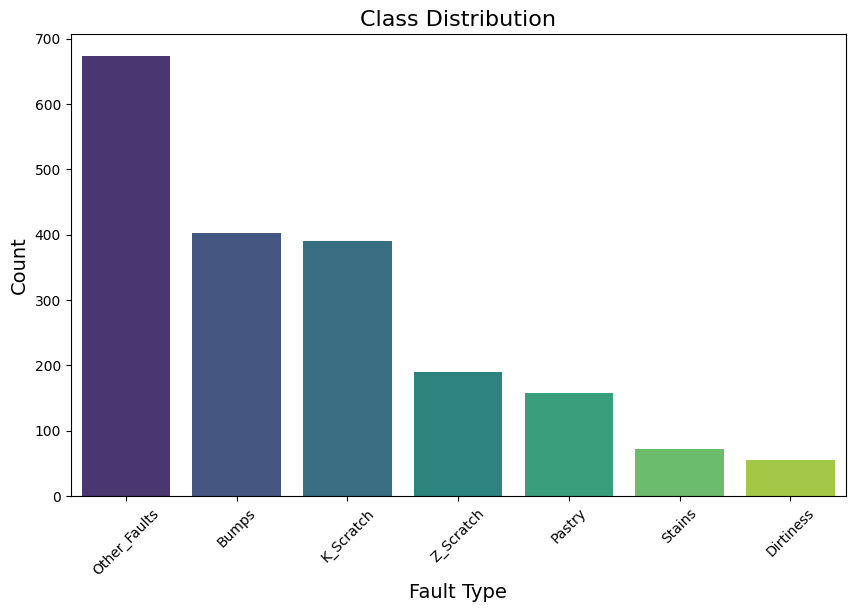

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "normalized_data.csv"  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Extract labels (last six columns assumed to be one-hot encoded fault types)
labels = data.iloc[:, -7:]

# Combine one-hot encoded labels into a single column with the class name
labels['Class'] = labels.idxmax(axis=1)  # Find the column name with the maximum value

# Count the occurrences of each class
class_counts = labels['Class'].value_counts()

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution", fontsize=16)
plt.xlabel("Fault Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [5]:
#LDA and PCA feature engineering


import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Load the data (already normalized)
data = pd.read_csv('normalized_data.csv')

# Separate features and target
# Assuming the last 7 columns are the one-hot encoded fault types
X = data.iloc[:, :-7].values
y = data.iloc[:, -7:].values

# Convert one-hot encoded labels to class labels
y_class = np.argmax(y, axis=1)

# Implement PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Cumulative Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.savefig('pca_variance_ratio.png')
plt.close()

# Choose number of components that explain 95% of variance
n_components_pca = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of PCA components needed for 95% variance: {n_components_pca}")

# Implement LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y_class)

# Function to evaluate feature engineering using KNN classifier
def evaluate_features(X, y, cv=5):
    knn = KNeighborsClassifier(n_neighbors=5)
    scores = cross_val_score(knn, X, y_class, cv=cv, scoring='accuracy')
    return scores.mean(), scores.std()

# Compare original, PCA, and LDA features
X_pca_final = X_pca[:, :n_components_pca]
results = {
    'Original': evaluate_features(X, y_class),
    'PCA': evaluate_features(X_pca_final, y_class),
    'LDA': evaluate_features(X_lda, y_class)
}

# Plot comparison results
plt.figure(figsize=(10, 6))
methods = list(results.keys())
accuracies = [res[0] for res in results.values()]
errors = [res[1] for res in results.values()]

plt.bar(methods, accuracies, yerr=errors, capsize=5)
plt.ylabel('Classification Accuracy')
plt.title('Feature Engineering Methods Comparison')
plt.savefig('feature_engineering_comparison.png')
plt.close()

# Create 2D scatter plots for visualization
plt.figure(figsize=(15, 5))

# Original data (using first two features)
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y_class, cmap='viridis')
plt.title('Original Features\n(First 2 Dimensions)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# PCA
plt.subplot(132)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_class, cmap='viridis')
plt.title('PCA Features\n(First 2 Components)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# LDA
plt.subplot(133)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_class, cmap='viridis')
plt.title('LDA Features\n(First 2 Components)')
plt.xlabel('LD1')
plt.ylabel('LD2')

plt.tight_layout()
plt.savefig('feature_engineering_scatter.png')
plt.close()

# Calculate silhouette scores for clustering quality comparison
silhouette_scores = {
    'Original': silhouette_score(X, y_class),
    'PCA': silhouette_score(X_pca_final, y_class),
    'LDA': silhouette_score(X_lda, y_class)
}

print("\nSilhouette Scores:")
for method, score in silhouette_scores.items():
    print(f"{method}: {score:.3f}")

# Save transformed datasets to CSV
# PCA dataset
pca_df = pd.DataFrame(
    X_pca_final,
    columns=[f'PC{i+1}' for i in range(n_components_pca)]
)
pca_df = pd.concat([pca_df, data.iloc[:, -7:]], axis=1)
pca_df.to_csv('pca_transformed.csv', index=False)

# LDA dataset
lda_df = pd.DataFrame(
    X_lda,
    columns=[f'LD{i+1}' for i in range(min(6, X_lda.shape[1]))]  # LDA components limited by number of classes - 1
)
lda_df = pd.concat([lda_df, data.iloc[:, -7:]], axis=1)
lda_df.to_csv('lda_transformed.csv', index=False)

print("\nFeature Engineering Results Summary:")
print(f"Original features: {X.shape[1]}")
print(f"PCA features: {n_components_pca}")
print(f"LDA features: {X_lda.shape[1]}")

# Additional analysis: Feature importance in PCA
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame(
    pca.components_[:n_components_pca].T,
    columns=[f'PC{i+1}' for i in range(n_components_pca)],
    index=data.iloc[:, :-7].columns
)
sns.heatmap(feature_importance, cmap='coolwarm', center=0)
plt.title('PCA Components Feature Importance')
plt.tight_layout()
plt.savefig('pca_feature_importance.png')
plt.close()

Number of PCA components needed for 95% variance: 10

Silhouette Scores:
Original: 0.017
PCA: 0.019
LDA: 0.135

Feature Engineering Results Summary:
Original features: 27
PCA features: 10
LDA features: 6


In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the normalized data
data = pd.read_csv('normalized_data.csv')

# Separate features and true labels
X = data.iloc[:, :-7].values  # Features
y_true = np.argmax(data.iloc[:, -7:].values, axis=1)  # Convert one-hot to class labels

# Find optimal number of clusters using elbow method
inertias = []
silhouette_scores = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans_labels))

# Plot elbow curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)

plt.tight_layout()
plt.savefig('kmeans_optimization.png')
plt.close()

# Determine optimal k from elbow curve using second derivative
k_optimal = k_range[np.argmax(np.diff(np.diff(inertias))) + 1]
print(f"Optimal number of clusters (k) from elbow method: {k_optimal}")
print(f"Best silhouette score: {max(silhouette_scores)} at k={k_range[np.argmax(silhouette_scores)]}")

# Perform K-means clustering with optimal k
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Create results DataFrame
results_df = pd.DataFrame({
    'Original_Features': list(data.iloc[:, :-7].columns),
    'Cluster_Center_Values': list(kmeans.cluster_centers_.T)
})

# Create cluster assignments DataFrame
cluster_assignments = pd.DataFrame({
    'Cluster_Label': cluster_labels,
    'True_Label': y_true
})

# Add original features to cluster assignments
cluster_assignments = pd.concat([
    data.iloc[:, :-7],  # Original features
    cluster_assignments,  # Cluster and true labels
    data.iloc[:, -7:]   # Original one-hot encoded labels
], axis=1)

# Save results
results_df.to_csv('kmeans_analysis.csv', index=False)
cluster_assignments.to_csv('kmeans_clusters.csv', index=False)

# Create distribution matrix of true labels vs cluster labels
distribution_matrix = pd.crosstab(cluster_labels, y_true)
distribution_matrix.to_csv('kmeans_distribution.csv')

# Print summary statistics
print("\nK-means Clustering Summary:")
print(f"Number of clusters: {k_optimal}")
print(f"Total samples: {len(cluster_labels)}")
print("\nSamples per cluster:")
for cluster in range(k_optimal):
    print(f"Cluster {cluster}: {np.sum(cluster_labels == cluster)}")

print("\nCluster Centers Shape:", kmeans.cluster_centers_.shape)
print("\nSilhouette Score:", silhouette_score(X, cluster_labels))

Optimal number of clusters (k) from elbow method: 3
Best silhouette score: 0.30436566392717873 at k=2

K-means Clustering Summary:
Number of clusters: 3
Total samples: 1941

Samples per cluster:
Cluster 0: 454
Cluster 1: 776
Cluster 2: 711

Cluster Centers Shape: (3, 27)

Silhouette Score: 0.29950244461985964


2024-12-28 17:36:41,532 - INFO - Dataset loaded successfully with shape: (1941, 34)
2024-12-28 17:36:42,304 - INFO - Model training completed after 65 iterations



Metrics for each class:
              Sensitivity  Specificity  Accuracy
Class                                           
Pastry             0.4688       0.9720    0.9306
Z_Scratch          0.8182       0.9775    0.9640
K_Scratch          0.9437       0.9874    0.9794
Stains             1.0000       0.9946    0.9949
Dirtiness          0.7778       0.9895    0.9846
Bumps              0.6711       0.9137    0.8663
Other_Faults       0.5197       0.9198    0.7635

Overall metrics:
Overall Sensitivity: 0.7427
Overall Specificity: 0.9649
Overall Accuracy: 0.6427


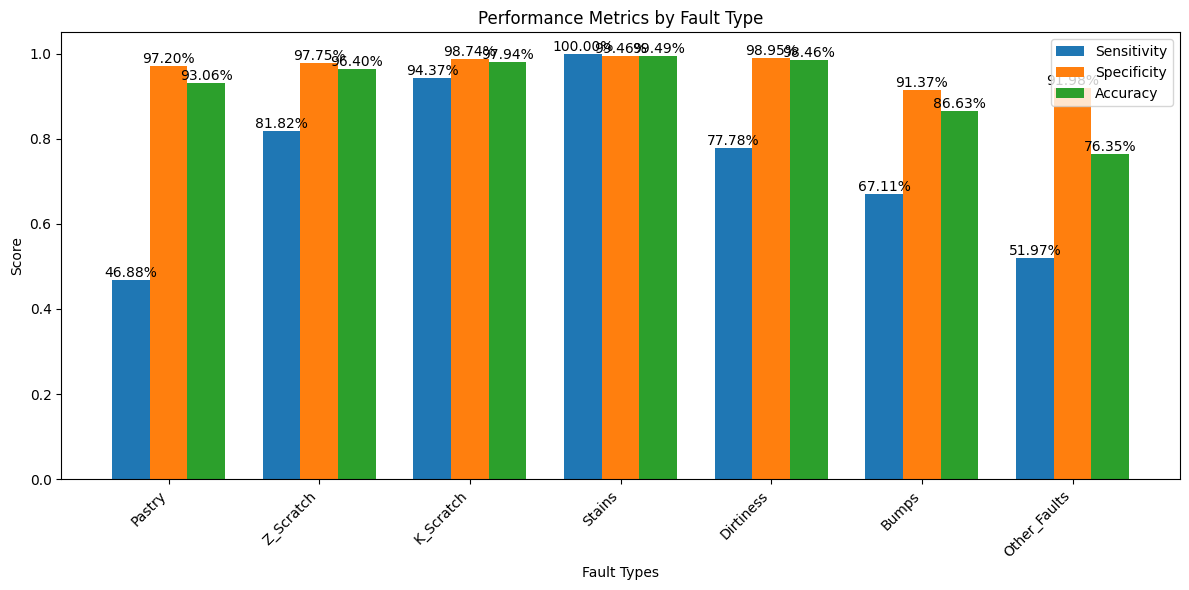

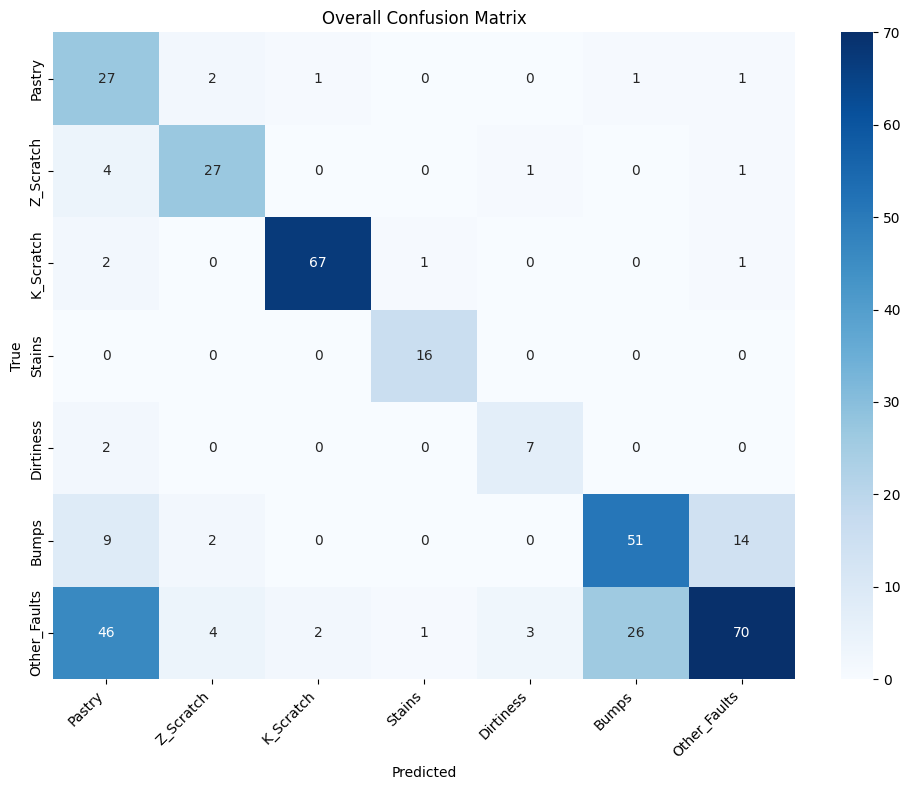

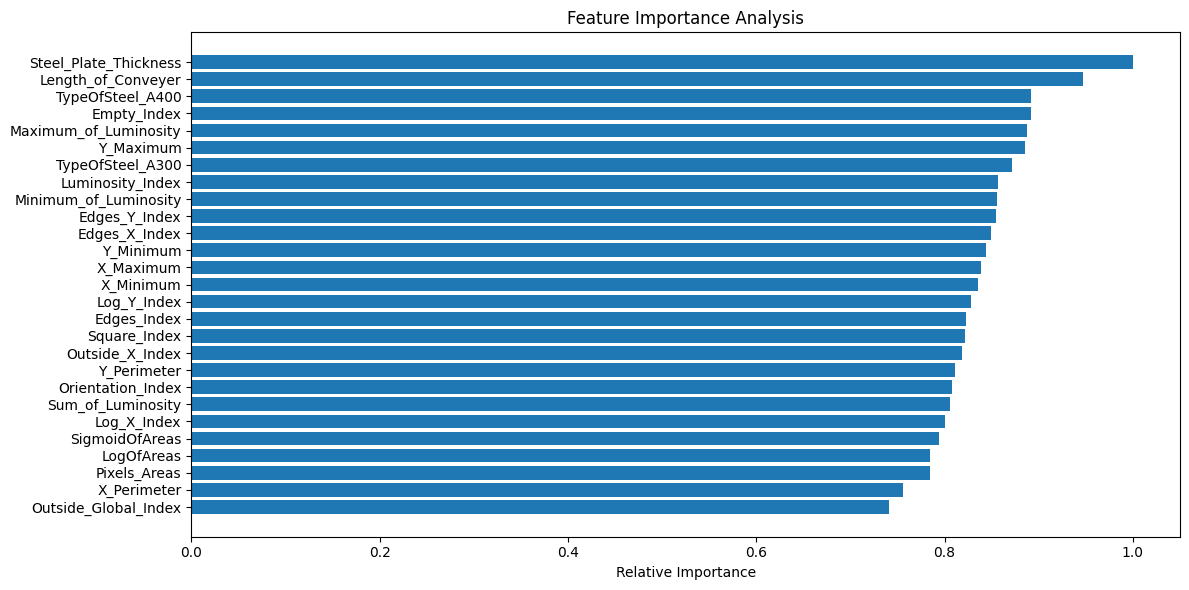

2024-12-28 17:36:43,170 - ERROR - Error in model evaluation: name 'X_train' is not defined
2024-12-28 17:36:43,172 - ERROR - Error in main pipeline: name 'X_train' is not defined


NameError: name 'X_train' is not defined

In [10]:
#MLP classifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from pathlib import Path

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)


def calculate_sensitivity_analysis(model, X_train, X_test, y_train, y_test):
    """Perform sensitivity analysis by removing each feature."""
    sensitivity_results = []
    base_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    for feature_index in range(X_train.shape[1]):
        # Remove one feature
        X_train_modified = np.delete(X_train.values, feature_index, axis=1)
        X_test_modified = np.delete(X_test.values, feature_index, axis=1)
        
        # Train new model
        temp_model = MLPClassifier(
            hidden_layer_sizes=(100, 50),
            activation='relu',
            solver='adam',
            alpha=0.0001,
            max_iter=1000,
            random_state=42
        )
        
        temp_model.fit(X_train_modified, y_train)
        modified_accuracy = accuracy_score(y_test, temp_model.predict(X_test_modified))
        
        sensitivity_results.append({
            'Feature Index': feature_index,
            'Feature Name': X_train.columns[feature_index],
            'Accuracy': modified_accuracy
        })
    
    return sensitivity_results

def plot_sensitivity_analysis(sensitivity_results):
    """Plot sensitivity analysis results."""
    plt.figure(figsize=(15, 6))
    
    feature_indices = [r['Feature Index'] for r in sensitivity_results]
    accuracies = [r['Accuracy'] for r in sensitivity_results]
    
    plt.plot(feature_indices, accuracies, 'bo-')
    plt.xlabel('Feature Index')
    plt.ylabel('Accuracy without Feature')
    plt.title('Sensitivity Analysis: Impact of Removing Each Feature')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_overall_confusion_matrix(y_test, y_pred, class_names):
    """Plot single confusion matrix for all classes."""
    # Convert one-hot encoded predictions to class labels
    y_test_class = np.argmax(y_test.values, axis=1)
    y_pred_class = np.argmax(y_pred, axis=1)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_class, y_pred_class)
    
    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Overall Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_feature_importance(model, feature_names):
    """Plot feature importance based on model weights."""
    # Calculate feature importance from neural network weights
    importance = np.zeros(len(feature_names))
    for layer in model.coefs_:
        importance += np.sum(np.abs(layer), axis=1)[:len(feature_names)]
    
    # Normalize importance scores
    importance = importance / np.max(importance)
    
    # Create DataFrame for plotting
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values('Importance', ascending=True)
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(importance_df)), importance_df['Importance'])
    plt.yticks(range(len(importance_df)), importance_df['Feature'])
    plt.xlabel('Relative Importance')
    plt.title('Feature Importance Analysis')
    plt.tight_layout()
    plt.show()

def load_and_preprocess_data(file_path):
    """Load and preprocess the dataset."""
    try:
        if not Path(file_path).exists():
            raise FileNotFoundError(f"Dataset not found at {file_path}")
            
        data = pd.read_csv(file_path)
        logger.info(f"Dataset loaded successfully with shape: {data.shape}")
        
        X = data.iloc[:, :-7]
        y = data.iloc[:, -7:]
        
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
        
        return X_scaled, y
        
    except Exception as e:
        logger.error(f"Error in data loading/preprocessing: {str(e)}")
        raise

def train_model(X_train, y_train):
    """Train the neural network model."""
    try:
        mlp = MLPClassifier(
            hidden_layer_sizes=(100, 50),
            activation='relu',
            solver='adam',
            alpha=0.0001,
            batch_size='auto',
            learning_rate='adaptive',
            max_iter=1000,
            early_stopping=True,
            validation_fraction=0.1,
            n_iter_no_change=10,
            random_state=42
        )
        
        mlp.fit(X_train, y_train)
        logger.info(f"Model training completed after {mlp.n_iter_} iterations")
        
        return mlp
        
    except Exception as e:
        logger.error(f"Error in model training: {str(e)}")
        raise

def calculate_metrics(y_true, y_pred):
    """Calculate sensitivity, specificity, and accuracy."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    return sensitivity, specificity, accuracy

def plot_metrics(metrics_df):
    """Plot sensitivity, specificity, and accuracy for each class."""
    plt.figure(figsize=(12, 6))
    
    barWidth = 0.25
    r1 = np.arange(len(metrics_df))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    
    plt.bar(r1, metrics_df['Sensitivity'], width=barWidth, label='Sensitivity')
    plt.bar(r2, metrics_df['Specificity'], width=barWidth, label='Specificity')
    plt.bar(r3, metrics_df['Accuracy'], width=barWidth, label='Accuracy')
    
    plt.xlabel('Fault Types')
    plt.ylabel('Score')
    plt.title('Performance Metrics by Fault Type')
    plt.xticks([r + barWidth for r in range(len(metrics_df))], metrics_df.index, rotation=45, ha='right')
    plt.legend()
    
    for i in range(len(r1)):
        plt.text(r1[i], metrics_df['Sensitivity'][i], f'{metrics_df["Sensitivity"][i]:.2%}', ha='center', va='bottom')
        plt.text(r2[i], metrics_df['Specificity'][i], f'{metrics_df["Specificity"][i]:.2%}', ha='center', va='bottom')
        plt.text(r3[i], metrics_df['Accuracy'][i], f'{metrics_df["Accuracy"][i]:.2%}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

def plot_all_confusion_matrices(y_test, y_pred, class_names):
    """Plot confusion matrices for all classes in a grid."""
    n_classes = len(class_names)
    n_rows = (n_classes + 3) // 4  # Calculate number of rows needed (ceiling division)
    n_cols = min(4, n_classes)  # Maximum 4 columns
    
    fig = plt.figure(figsize=(16, 4*n_rows))
    plt.suptitle('Confusion Matrices for All Fault Types', fontsize=16, y=1.02)
    
    for idx, class_name in enumerate(class_names):
        plt.subplot(n_rows, n_cols, idx + 1)
        cm = confusion_matrix(y_test[class_name], y_pred[:, idx])
        
        # Calculate percentages for annotations
        cm_percentages = cm / cm.sum() * 100
        
        # Create annotations with both count and percentage
        annotations = np.array([
            [f'{count}\n({percentage:.1f}%)' 
             for count, percentage in zip(row, row_percentages)]
            for row, row_percentages in zip(cm, cm_percentages)
        ])
        
        sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues',
                   xticklabels=['No', 'Yes'],
                   yticklabels=['No', 'Yes'])
        plt.title(f'{class_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
    
    plt.tight_layout()
    plt.show()
    
    # Additional summary plot of total predictions per class
    plt.figure(figsize=(10, 5))
    class_predictions = [y_pred[:, i].sum() for i in range(len(class_names))]
    plt.bar(class_names, class_predictions)
    plt.title('Total Positive Predictions per Class')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Positive Predictions')
    plt.tight_layout()
    plt.show()

def evaluate_model(model, X_test, y_test, class_names):
    """Evaluate the model and visualize results."""
    try:
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics for each class
        metrics_data = []
        for i, col in enumerate(class_names):
            sensitivity, specificity, accuracy = calculate_metrics(y_test[col], y_pred[:, i])
            metrics_data.append({
                'Class': col,
                'Sensitivity': sensitivity,
                'Specificity': specificity,
                'Accuracy': accuracy
            })
        
        # Create metrics DataFrame
        metrics_df = pd.DataFrame(metrics_data)
        metrics_df.set_index('Class', inplace=True)
        
        # Calculate overall metrics
        overall_sensitivity = np.mean(metrics_df['Sensitivity'])
        overall_specificity = np.mean(metrics_df['Specificity'])
        overall_accuracy = accuracy_score(y_test, y_pred)
        
        # Print metrics
        print("\nMetrics for each class:")
        print(metrics_df.round(4))
        print("\nOverall metrics:")
        print(f"Overall Sensitivity: {overall_sensitivity:.4f}")
        print(f"Overall Specificity: {overall_specificity:.4f}")
        print(f"Overall Accuracy: {overall_accuracy:.4f}")
        
        # Plot metrics
        plot_metrics(metrics_df)

         # Add new plots
        plot_overall_confusion_matrix(y_test, y_pred, class_names)
        plot_feature_importance(model, X_test.columns)

        sensitivity_results = calculate_sensitivity_analysis(
            model, X_train, X_test, y_train, y_test
        )
        plot_sensitivity_analysis(sensitivity_results)
        
        # Plot all confusion matrices
        plot_all_confusion_matrices(y_test, y_pred, class_names)
        
        return overall_accuracy, y_pred, metrics_df
        
    except Exception as e:
        logger.error(f"Error in model evaluation: {str(e)}")
        raise

def main():
    """Main function to run the classification pipeline."""
    try:
        X, y = load_and_preprocess_data('steel_plates_faults.csv')
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y.iloc[:, 0]
        )
        
        model = train_model(X_train, y_train)
        
        accuracy, predictions, metrics = evaluate_model(model, X_test, y_test, y.columns)
        
        return model, accuracy, predictions, metrics
        
    except Exception as e:
        logger.error(f"Error in main pipeline: {str(e)}")
        raise

if __name__ == "__main__":
    main()

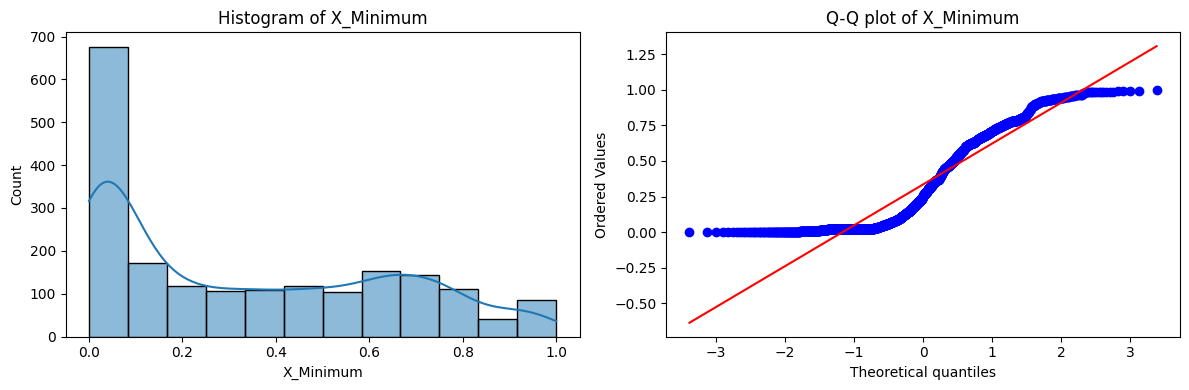

X_Minimum: Shapiro-Wilk test p-value: 2.0191104525496668e-36


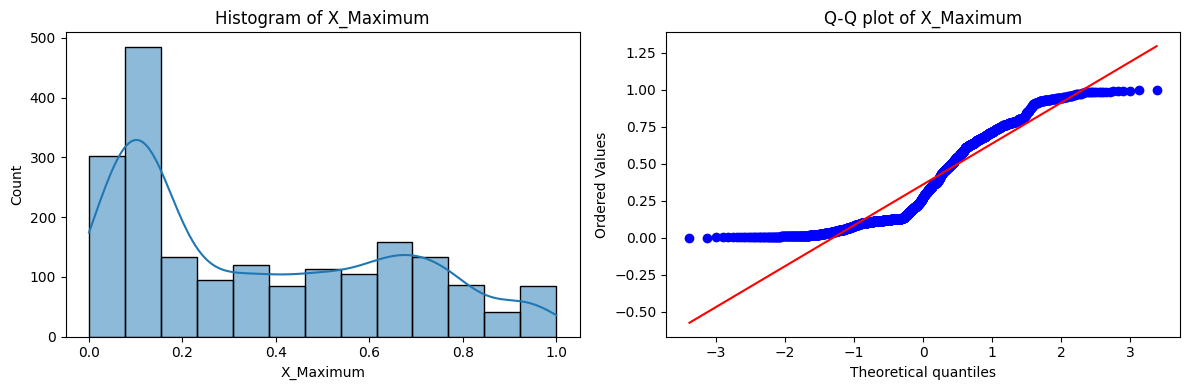

X_Maximum: Shapiro-Wilk test p-value: 3.165705577020528e-34


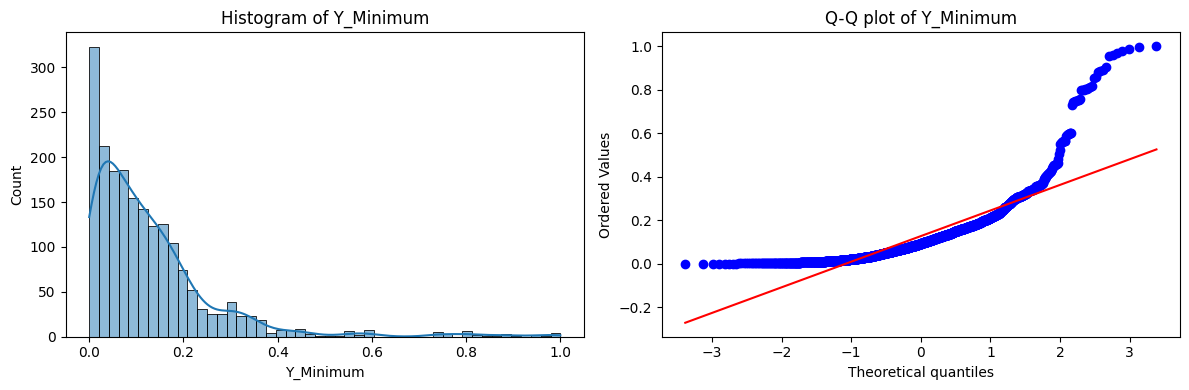

Y_Minimum: Shapiro-Wilk test p-value: 7.302288349770227e-48


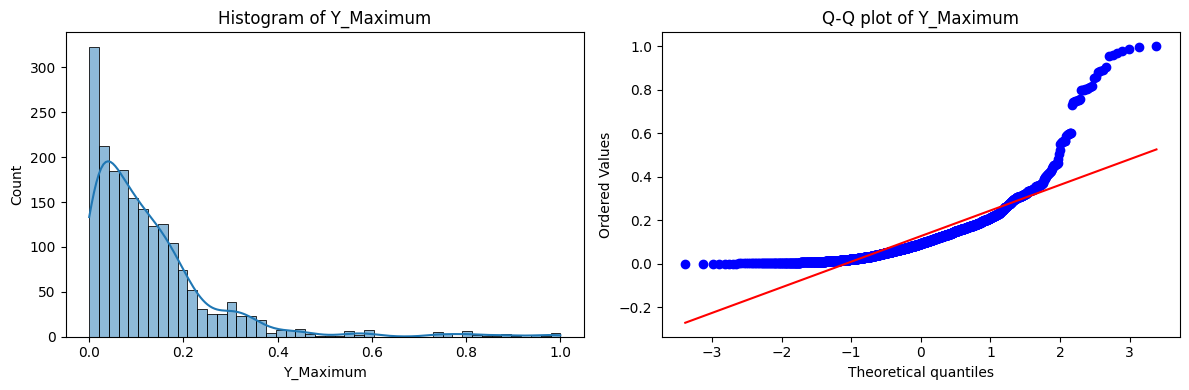

Y_Maximum: Shapiro-Wilk test p-value: 7.305899502201801e-48


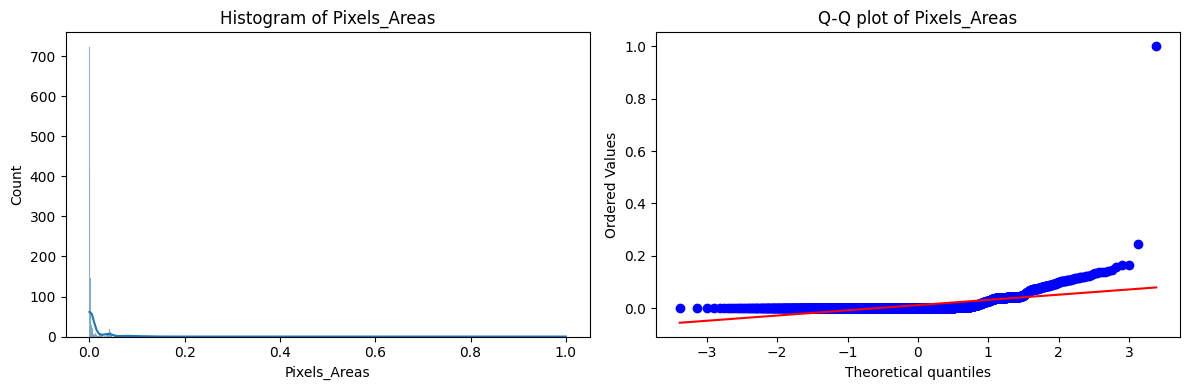

Pixels_Areas: Shapiro-Wilk test p-value: 7.649543823050017e-64


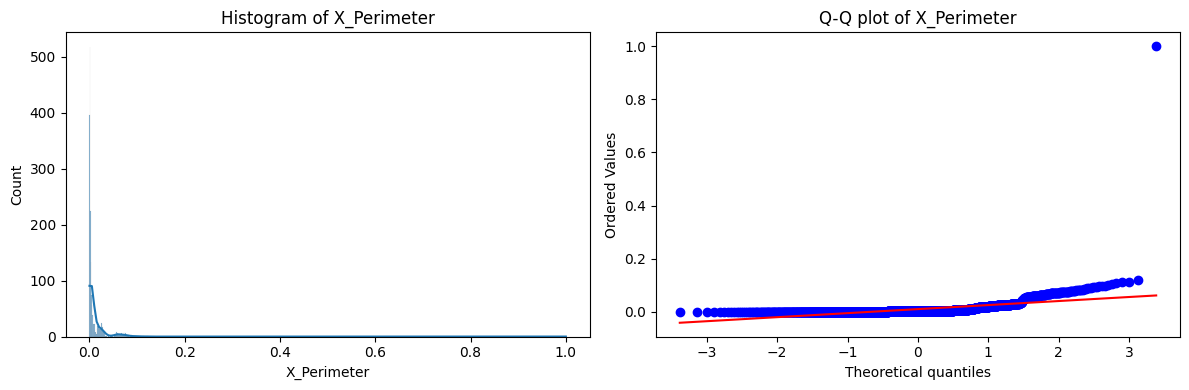

X_Perimeter: Shapiro-Wilk test p-value: 1.0537185910525782e-65


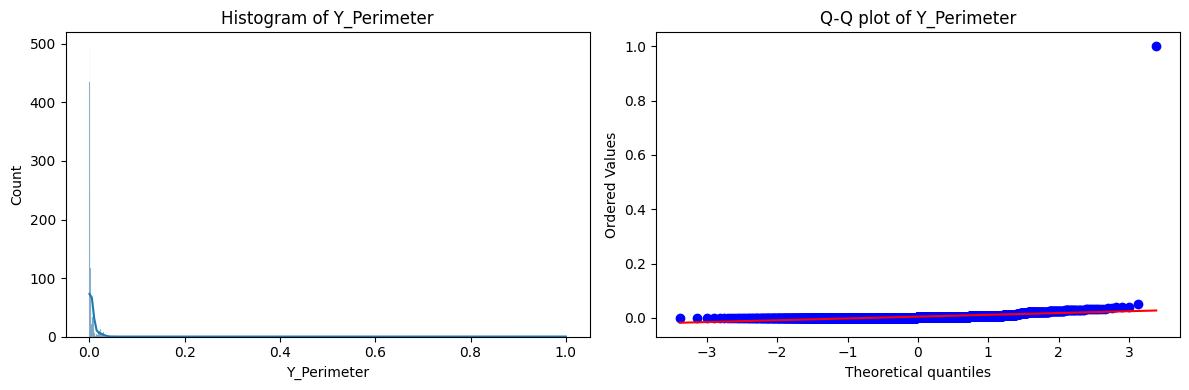

Y_Perimeter: Shapiro-Wilk test p-value: 2.2405222696360296e-70


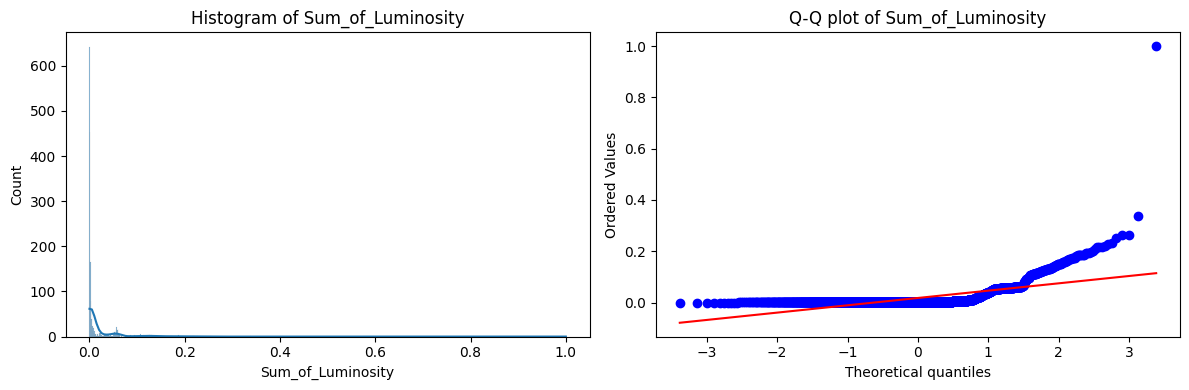

Sum_of_Luminosity: Shapiro-Wilk test p-value: 1.0704948205808266e-61


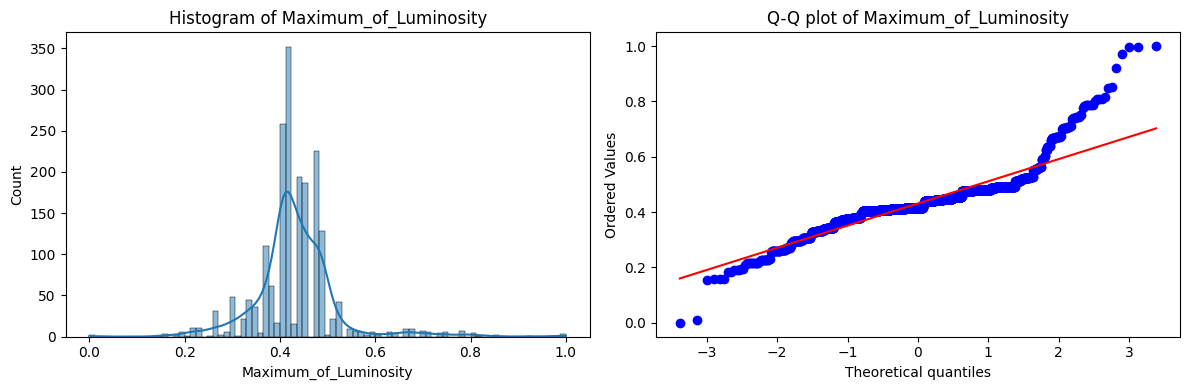

Maximum_of_Luminosity: Shapiro-Wilk test p-value: 1.0642766384528512e-38


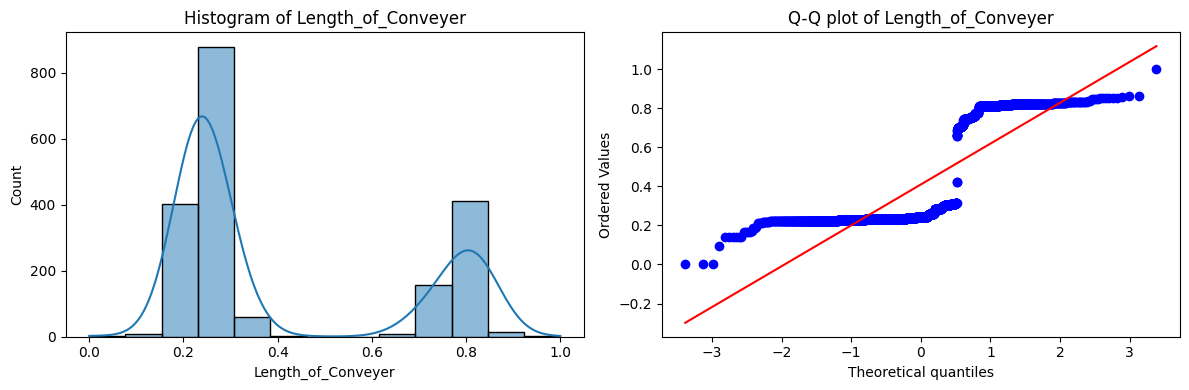

Length_of_Conveyer: Shapiro-Wilk test p-value: 9.060513334394654e-52


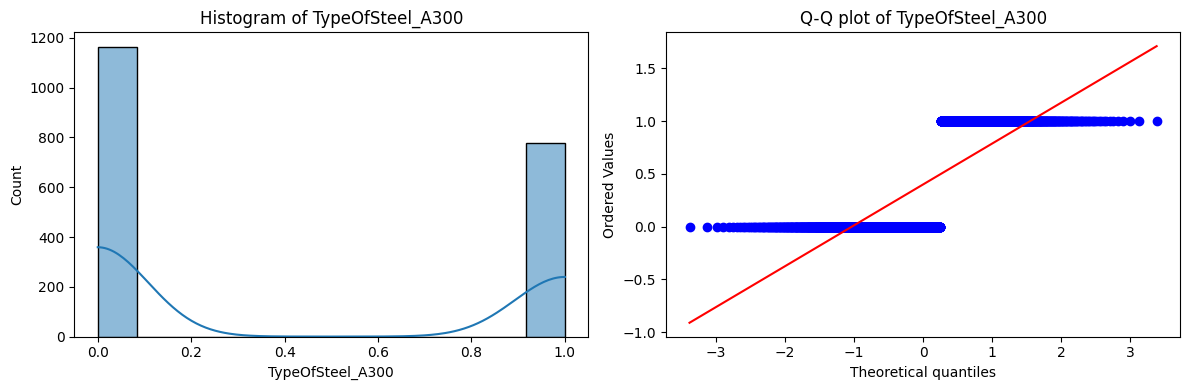

TypeOfSteel_A300: Shapiro-Wilk test p-value: 4.0992634260286e-54


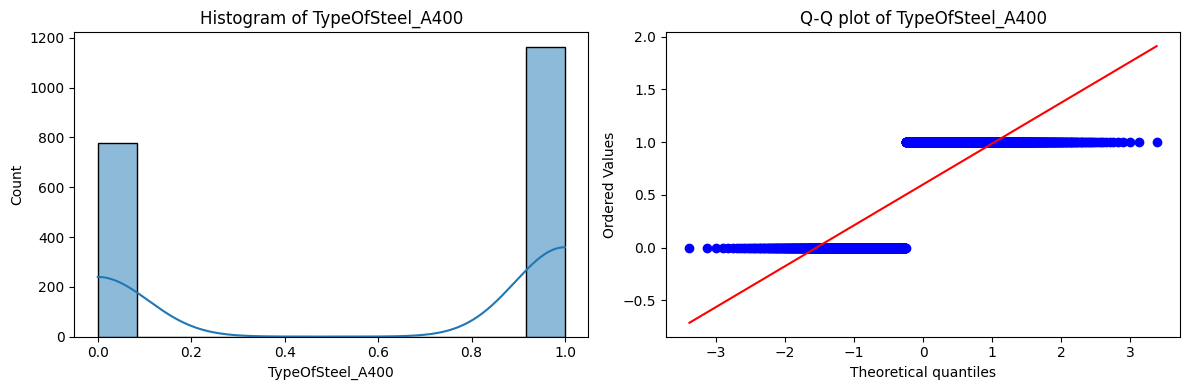

TypeOfSteel_A400: Shapiro-Wilk test p-value: 4.0992634260297695e-54


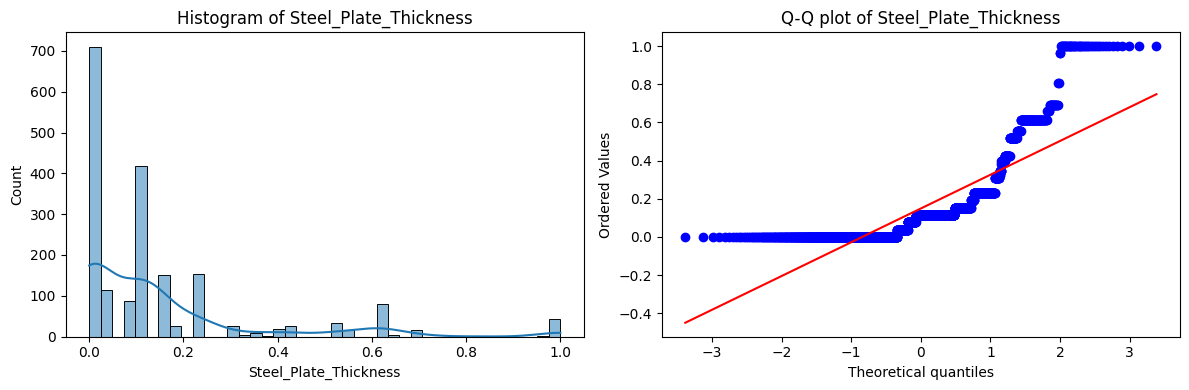

Steel_Plate_Thickness: Shapiro-Wilk test p-value: 1.9465873207366807e-50


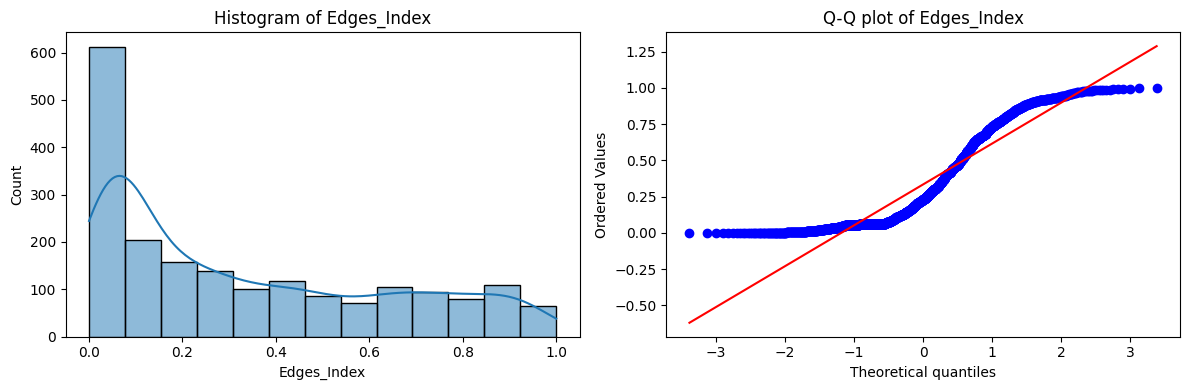

Edges_Index: Shapiro-Wilk test p-value: 4.286886998900598e-37


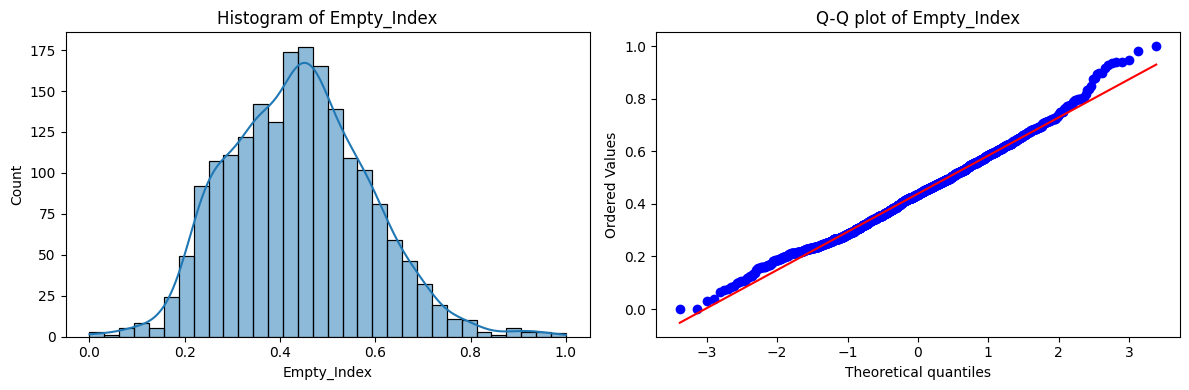

Empty_Index: Shapiro-Wilk test p-value: 8.606978113719092e-08


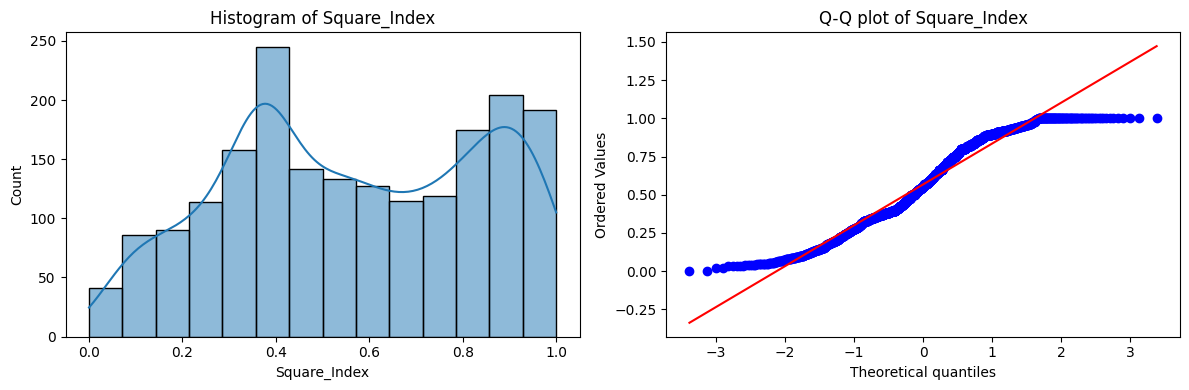

Square_Index: Shapiro-Wilk test p-value: 3.7971609018612794e-24


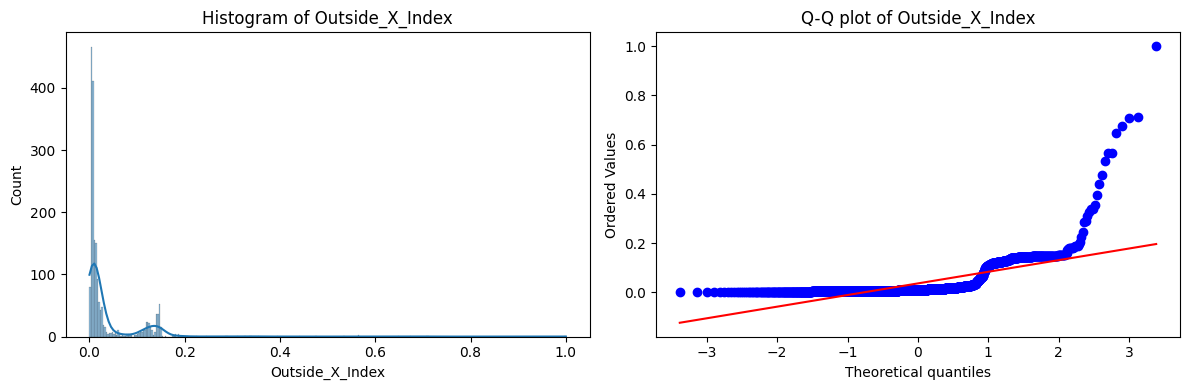

Outside_X_Index: Shapiro-Wilk test p-value: 2.637211636449452e-59


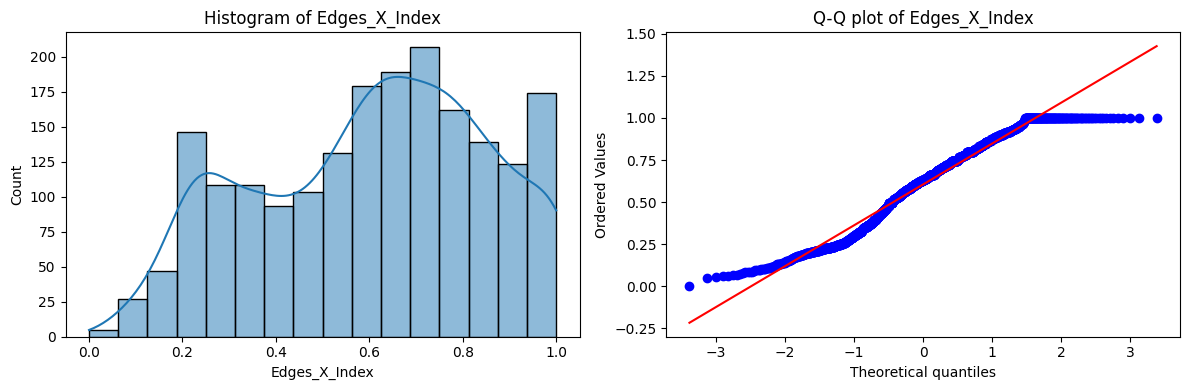

Edges_X_Index: Shapiro-Wilk test p-value: 2.3166408272986402e-21


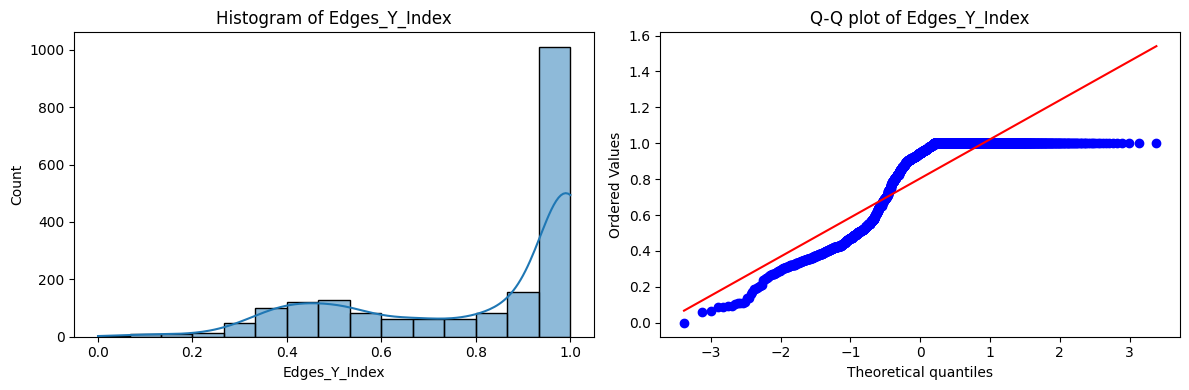

Edges_Y_Index: Shapiro-Wilk test p-value: 2.5421604584094813e-45


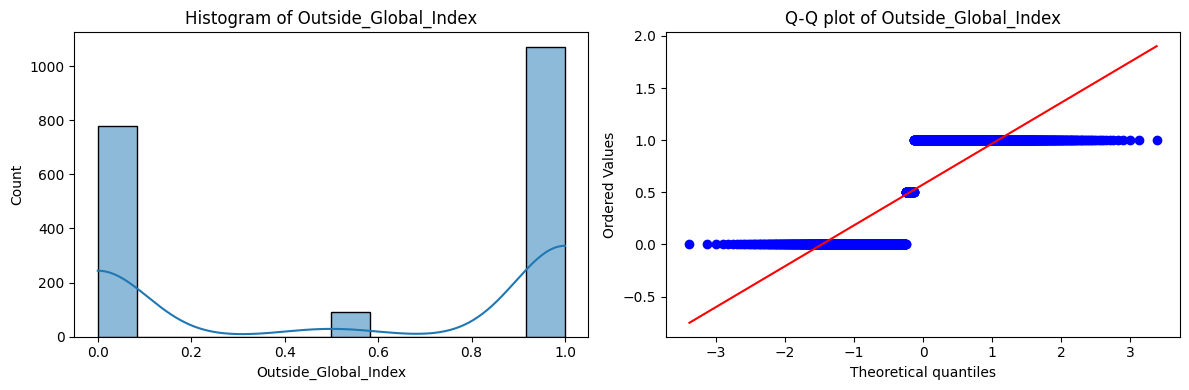

Outside_Global_Index: Shapiro-Wilk test p-value: 1.9412387981167434e-52


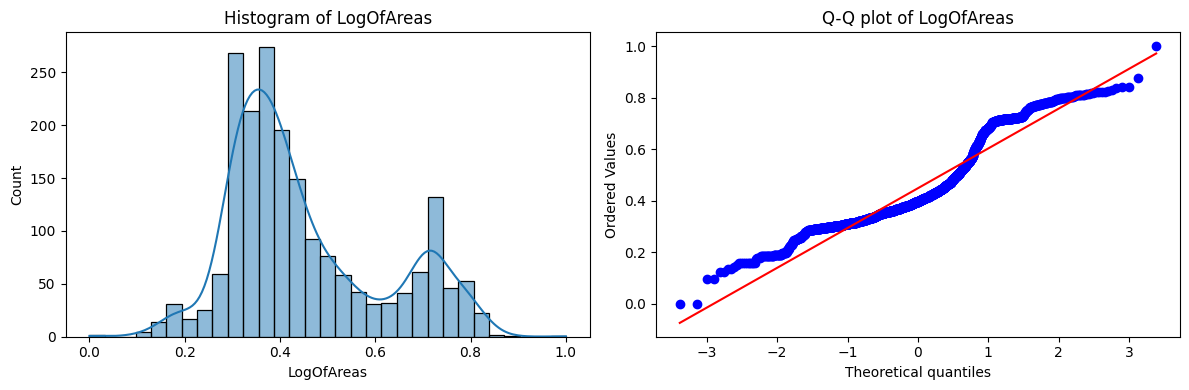

LogOfAreas: Shapiro-Wilk test p-value: 3.3469243777468345e-32


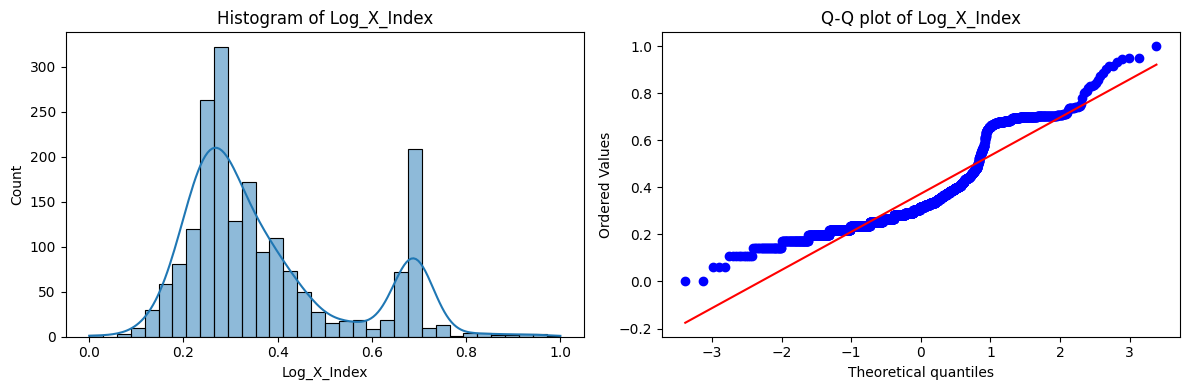

Log_X_Index: Shapiro-Wilk test p-value: 1.248744048227522e-37


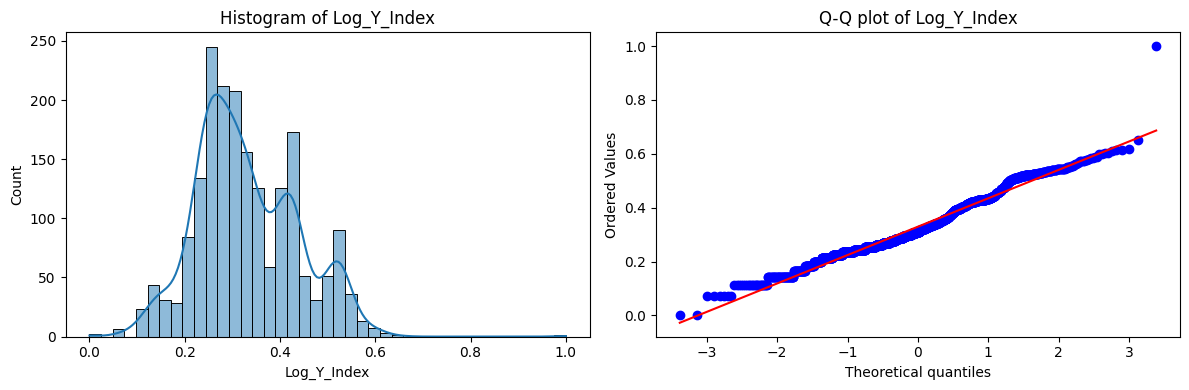

Log_Y_Index: Shapiro-Wilk test p-value: 1.8073851962844158e-17


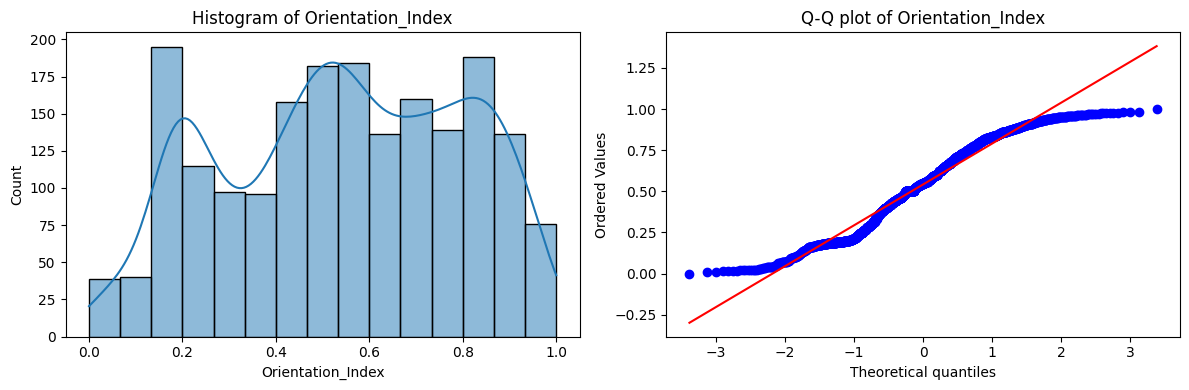

Orientation_Index: Shapiro-Wilk test p-value: 9.830570282725586e-22


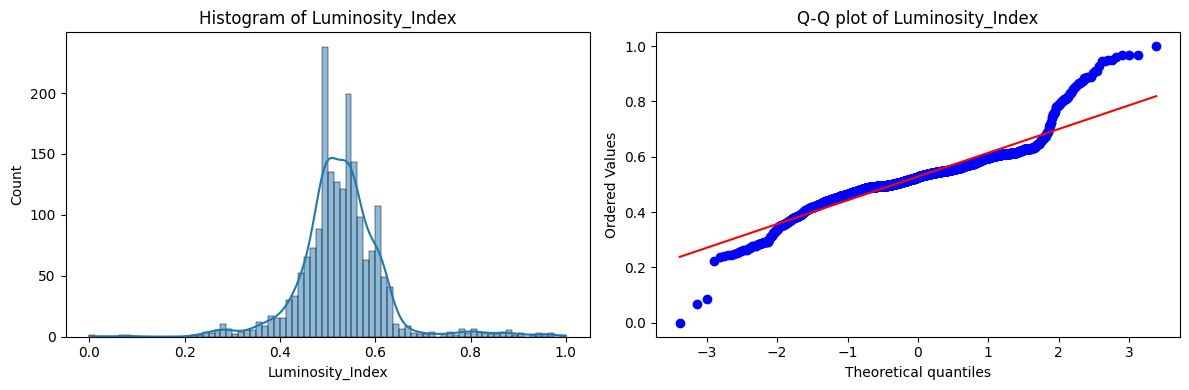

Luminosity_Index: Shapiro-Wilk test p-value: 2.241942640228293e-34


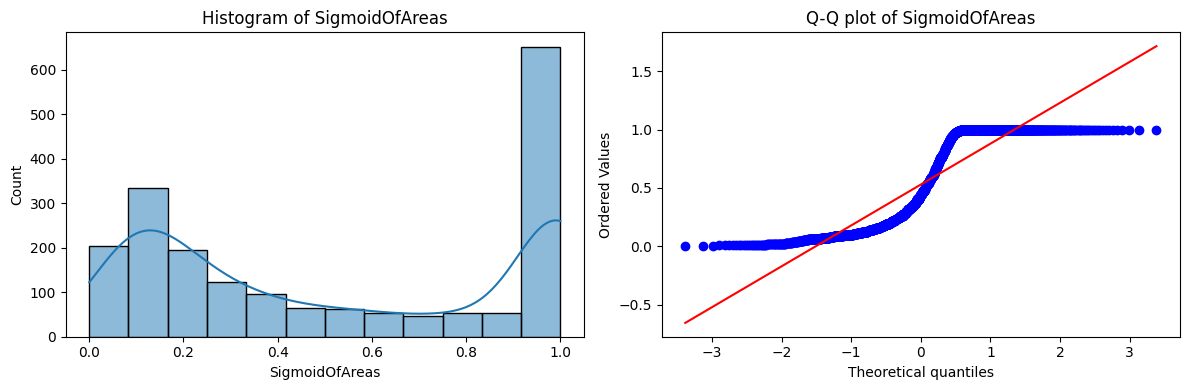

SigmoidOfAreas: Shapiro-Wilk test p-value: 5.529226849323026e-42


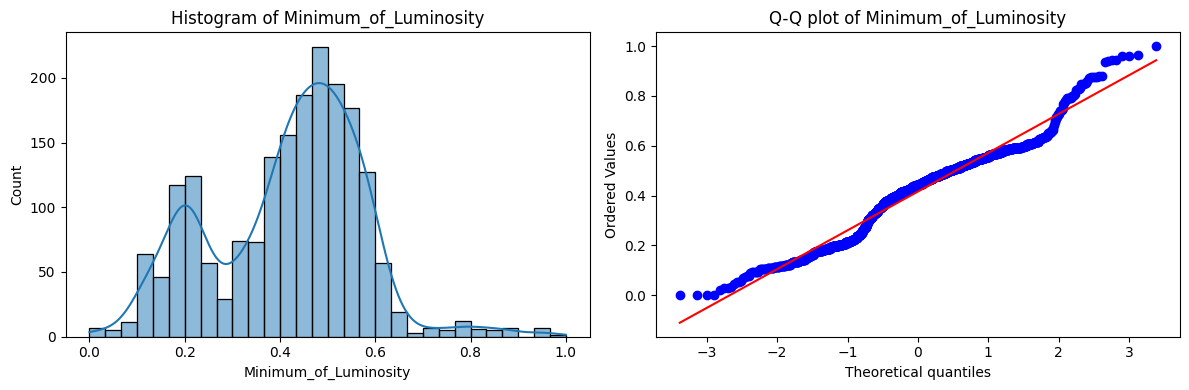

Minimum_of_Luminosity: Shapiro-Wilk test p-value: 2.3365305784247943e-21


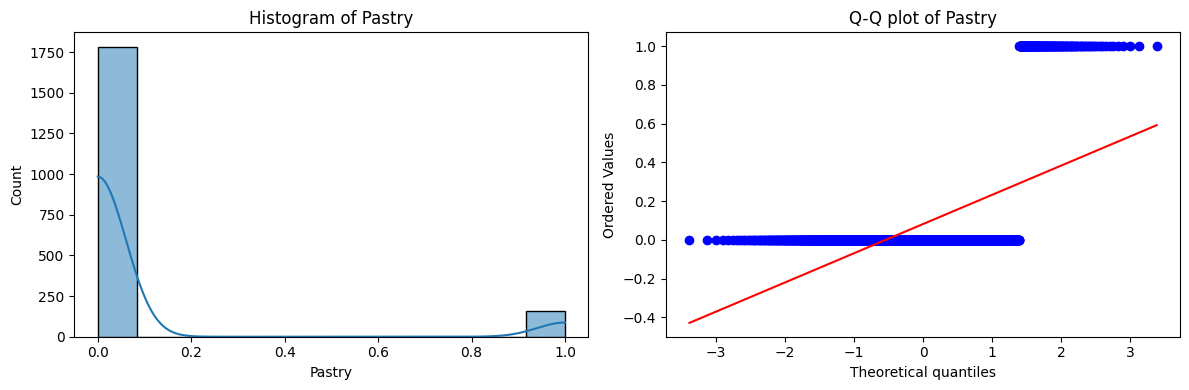

Pastry: Shapiro-Wilk test p-value: 4.236873713518173e-65


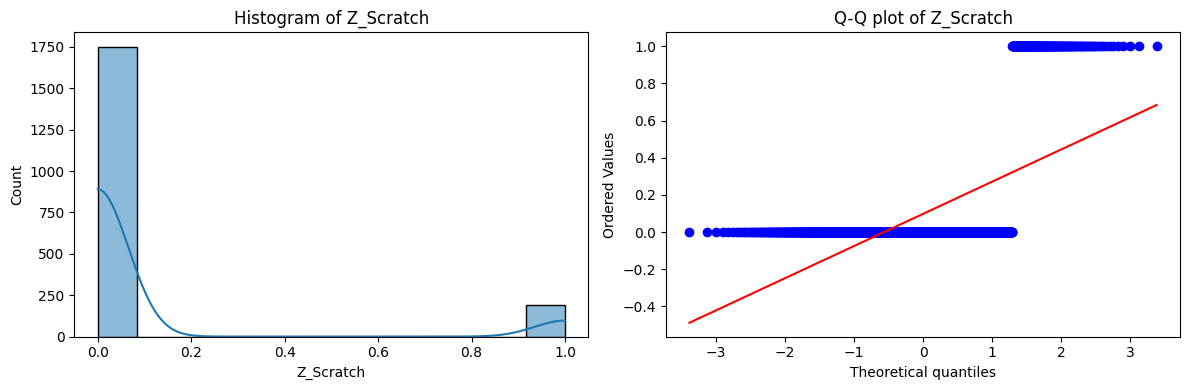

Z_Scratch: Shapiro-Wilk test p-value: 3.829489096850289e-64


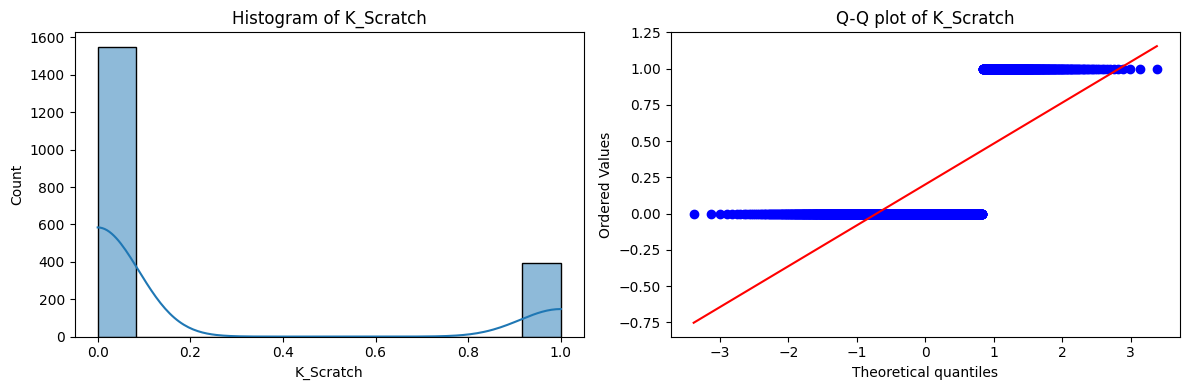

K_Scratch: Shapiro-Wilk test p-value: 2.57679592978613e-59


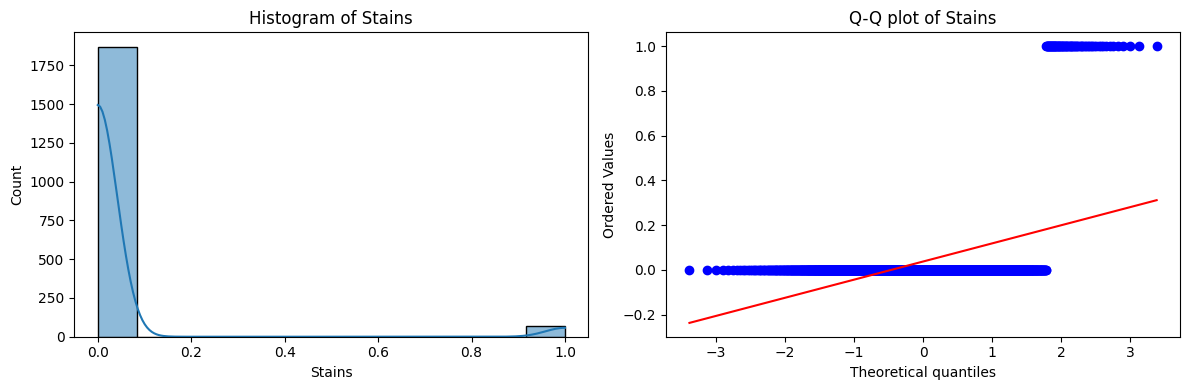

Stains: Shapiro-Wilk test p-value: 4.080242855773718e-68


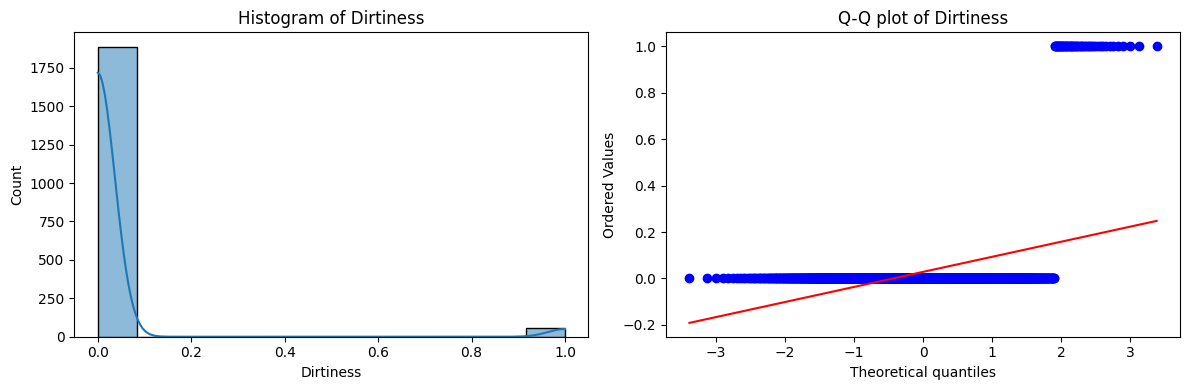

Dirtiness: Shapiro-Wilk test p-value: 7.813858680503798e-69


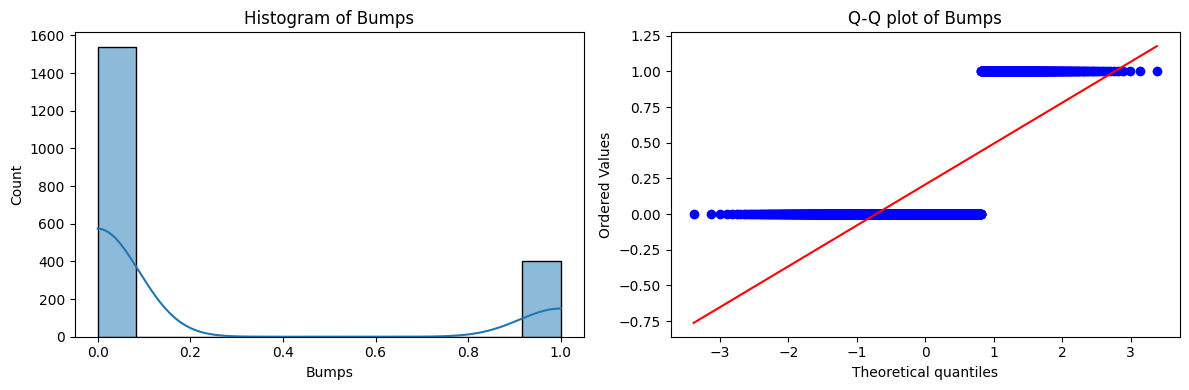

Bumps: Shapiro-Wilk test p-value: 4.255154956639074e-59


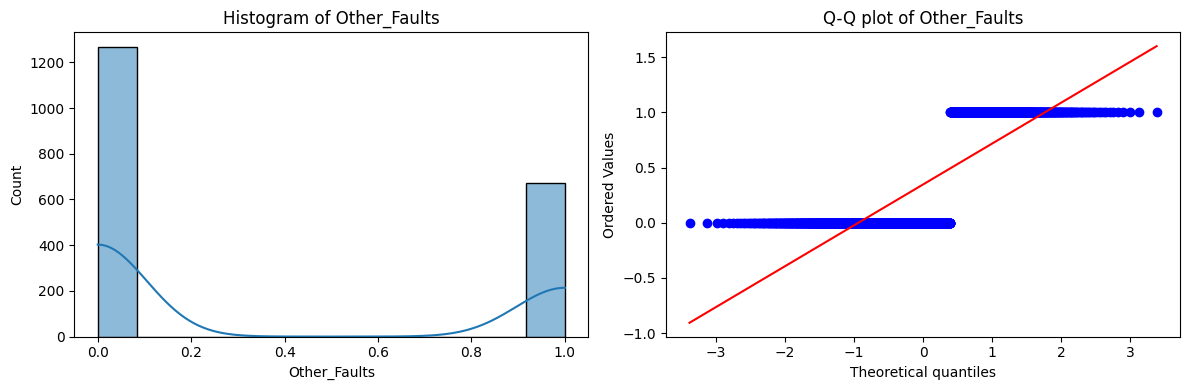

Other_Faults: Shapiro-Wilk test p-value: 5.078419384635968e-55
         X_Minimum    X_Maximum    Y_Minimum    Y_Maximum  Pixels_Areas  \
count  1941.000000  1941.000000  1941.000000  1941.000000   1941.000000   
mean      0.334977     0.359254     0.126645     0.126648      0.012393   
std       0.305390     0.291180     0.136706     0.136707      0.033858   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.029912     0.110006     0.035786     0.035788      0.000537   
50%       0.255132     0.270919     0.092244     0.092244      0.001127   
75%       0.617595     0.624927     0.167658     0.167658      0.005372   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

       X_Perimeter  Y_Perimeter  Sum_of_Luminosity  Maximum_of_Luminosity  \
count  1941.000000  1941.000000        1941.000000            1941.000000   
mean      0.010515     0.004516           0.017778               0.431452   
std       0.028832     0.02349

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read CSV
df = pd.read_csv('normalized_data.csv')

# Plot histogram and Q-Q plot for each column
for col in df.columns:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(121)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    # Q-Q plot
    plt.subplot(122)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Shapiro-Wilk test
    stat, p = stats.shapiro(df[col])
    print(f'{col}: Shapiro-Wilk test p-value: {p}')

# Descriptive statistics
print(df.describe())